## Lab Exercise 7
#### Prepare and Explore Data
We will use the customer data with attributes of 5 geometric measurements:
1. CustomerID
2. Gender
3. Age
4. AnnualIncome
5. SpendingScore

In [118]:
# Import pandas library
import pandas as pd

In [119]:
# Read csv data file
x = pd.read_csv('Data/customers.csv')
x.head()

,CustomerID,Gender,Age,AnnualIncome,SpendingScore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [120]:
# View the number of instances and attributes
x.shape

(200, 5)

In [121]:
# View a summary of the data
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   CustomerID     200 non-null    int64 
 1   Gender         200 non-null    object
 2   Age            200 non-null    int64 
 3   AnnualIncome   200 non-null    int64 
 4   SpendingScore  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [122]:
cols_to_float = ['CustomerID', 'Age', 'AnnualIncome', 'SpendingScore']
x['Gender'] = x['Gender'].map({'Male': 0, 'Female': 1}).astype(float)

x[cols_to_float] = x[cols_to_float].astype(float)

x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CustomerID     200 non-null    float64
 1   Gender         200 non-null    float64
 2   Age            200 non-null    float64
 3   AnnualIncome   200 non-null    float64
 4   SpendingScore  200 non-null    float64
dtypes: float64(5)
memory usage: 7.9 KB


In [135]:
# Create a subset of the data frame containing 2 attributes
x2 = x[['AnnualIncome', 'SpendingScore']]
x2.head()

,AnnualIncome,SpendingScore
0,15.0,39.0
1,15.0,81.0
2,16.0,6.0
3,16.0,77.0
4,17.0,40.0


#### K-Means Clustering
K-Means finds the best centroids by alternating between (1) assigning data points to clusters based on the current centroids (2)chosing centroids (points which are the center of a cluster) based on the current assignment of data points to clusters.We will first run k-means clustering on x2.

c:\Users\dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows wi

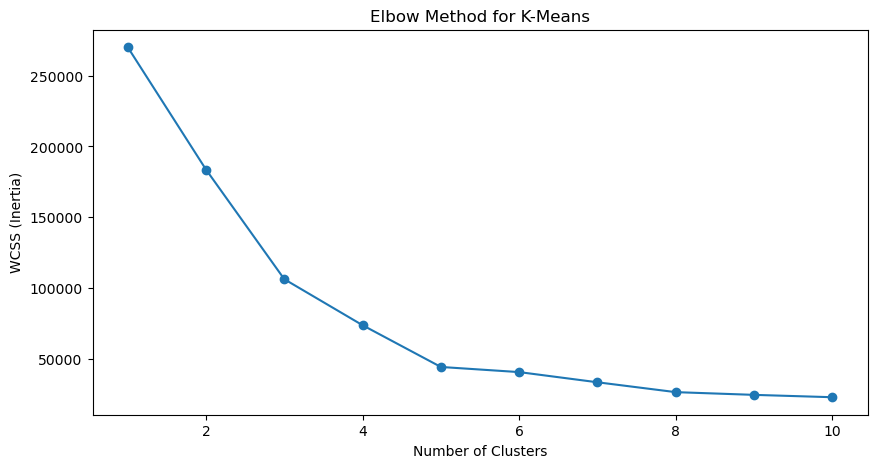

In [139]:
# ---------------------------------------------------------
# 2. K-Means Clustering
# ---------------------------------------------------------
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# Find the optimal number of clusters using the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x2)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for K-Means')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Inertia)')
plt.show()

Based on the Elbow plot, 5 clusters is the optimal choice

In [221]:
# Create KMeans object
kmeans = KMeans(n_clusters = 5, random_state = 0, n_init = 'auto')
# Fit KMeans object to data
kmeans.fit(x2)
# Print results for interpretation 
print("Coordinates of cluster centers: ", kmeans.cluster_centers_)
print("Label of each point: ", kmeans.labels_)
print("Number of iterations run: ", kmeans.n_iter_)

Coordinates of cluster centers:  [[55.2962963  49.51851852]
 [86.53846154 82.12820513]
 [88.2        17.11428571]
 [26.30434783 20.91304348]
 [25.72727273 79.36363636]]
Label of each point:  [3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 0 3 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 0 1 2 1 2 1 0 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]
Number of iterations run:  6


c:\Users\dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


From the label of each point, note that the clusters are labeled cluster 0, cluster 1 and cluster 2. In the example above, we onlyspecify the n_cluster parameter to set the number of clusters and random_state parameter to ensure we get reproducible results.

For more information about KMeans parameters we can set, check out: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html.Since there are only 2 dimensions (i.e., 2 attributes), we can map the data points in a 2-dimensional scatter plot. The first 2parameters in scatter() indicates the data position. The first parameter indicates all the area values in cluster 0. The secondparameter indicates all the perimeter values in cluster 0

In [222]:
# Save new clusters for plot
y_kmeans = kmeans.fit_predict(x2)
y_kmeans

c:\Users\dell\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

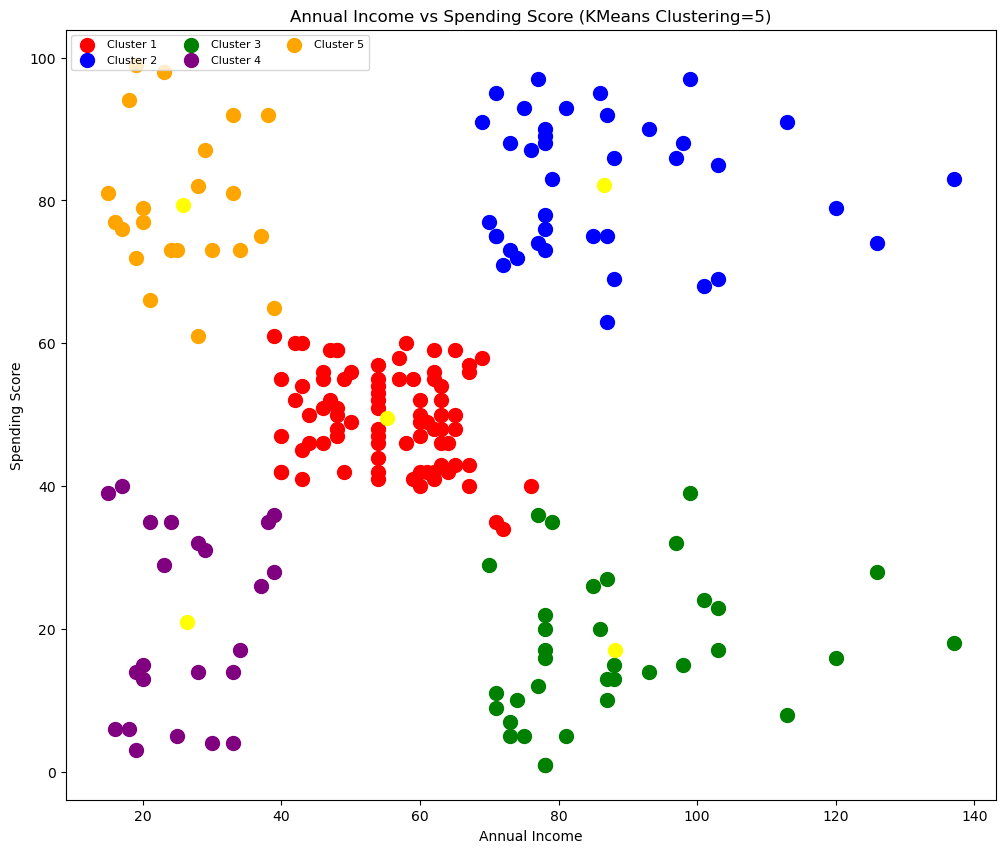

In [223]:
# Import pyplot for plotting
import matplotlib.pyplot as plt
# Set plot size
plt.figure(figsize = (12,10))
# Plot the 3 clusters# Visualising cluster 0
cluster0 = plt.scatter(x2.iloc[y_kmeans == 0, 0], x2.iloc[y_kmeans == 0, 1], s = 100,                      
                       c = 'red', label = 'Cluster 1')
# Visualizing cluster 1
cluster1 = plt.scatter(x2.iloc[y_kmeans == 1, 0], x2.iloc[y_kmeans == 1, 1], s = 100,                        
                       c= 'blue', label = 'Cluster 2')
# Visualing cluster 2
cluster2 = plt.scatter(x2.iloc[y_kmeans == 2, 0], x2.iloc[y_kmeans == 2, 1], s = 100,                       
                       c = 'green', label = 'Cluster 3')
#Visualing cluster 3
cluster3 = plt.scatter(x2.iloc[y_kmeans == 3, 0], x2.iloc[y_kmeans == 3, 1], s = 100,                       
                      c = 'purple', label = 'Cluster 4')
# Visualing cluster 4
cluster4 = plt.scatter(x2.iloc[y_kmeans == 4, 0], x2.iloc[y_kmeans == 4, 1], s = 100,                      
                      c = 'orange', label = 'Cluster 5')
# Visualing cluster 5
cluster5 = plt.scatter(x2.iloc[y_kmeans == 5, 0], x2.iloc[y_kmeans == 5, 1], s = 100,                      
                      c = 'grey', label = 'Cluster 6')

# Plot the centroids# We are going to use the attribute that returns the coordinates of the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100,           
            c = 'yellow', label = 'Centroids')
# Show legend
plt.legend((cluster0, cluster1, cluster2, cluster3, cluster4),           ('Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4', 'Cluster 5'),           
           scatterpoints = 1,           
           loc = 'upper left',           
           ncol = 3,           
           fontsize = 8)
# Show plot title
plt.title('Annual Income vs Spending Score (KMeans Clustering=5)')
# Label x-axis
plt.xlabel('Annual Income')
# Label y-axis
plt.ylabel('Spending Score')
# Show plot
plt.show()

#### Agglomerative Clustering
For hierarchical clustering, we begin with every point in our dataset as a 'cluster'. Then, we find the two closest points andcombine them into a cluster. Then, we find the next closest points, and those become a cluster. We repeat the process until weonly have one big giant cluster.Hierarchical clustering is implemented using scikit-learn's AgglomerativeClustering
Let us first try to run AgglomerativeClustering on the dataset with 2 attributes (x2)

##### From the dendrogram, the longest vertical line without cross-lines indicates 5 clusters

In [184]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

for k in range(2, 8):
    agg = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = agg.fit_predict(x2)
    score = silhouette_score(x2, labels)
    print(f"Clusters = {k}, Silhouette Score = {score:.3f}")


Clusters = 2, Silhouette Score = 0.367
Clusters = 3, Silhouette Score = 0.462
Clusters = 4, Silhouette Score = 0.492
Clusters = 5, Silhouette Score = 0.553
Clusters = 6, Silhouette Score = 0.538
Clusters = 7, Silhouette Score = 0.520


Based on silhouette analysis, the optimal number of clusters for Agglomerative clustering is 5, as it yields the highest silhouette score (0.553)

In [185]:
# Import hierarchical clustering library
from sklearn.cluster import AgglomerativeClustering
# Create AgglomerativeClustering object
ag = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean', linkage = 'ward')
ag.fit(x2)
# Print the cluster label of each data point
print("Label of each point: ", ag.labels_)

Label of each point:  [4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


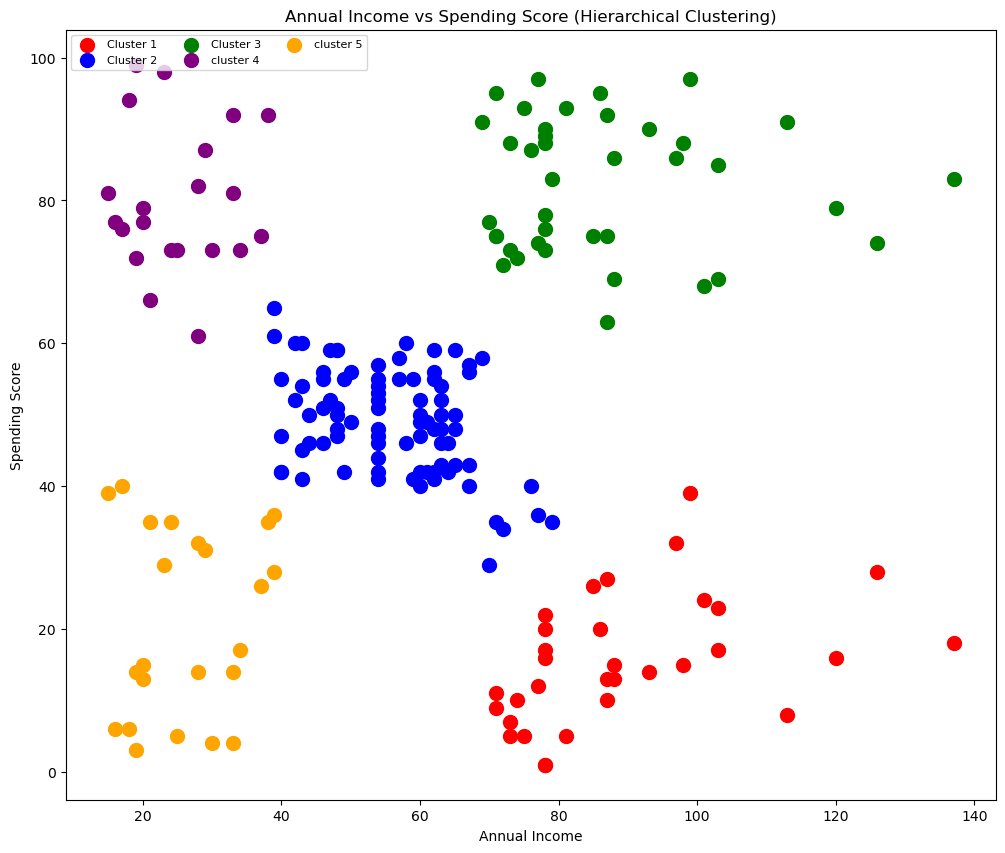

In [187]:
# Save new clusters for plot
y_hc = ag.fit_predict(x2)
y_hc
# Set plot size
plt.figure(figsize = (12,10))
# Plot the 3 clusters# Visualising cluster 0
cluster0 = plt.scatter(x2.iloc[y_hc == 0, 0], x2.iloc[y_hc == 0, 1], s = 100,                       
                       c = 'red', label = 'Cluster 1')
# Visualizing cluster 1
cluster1 = plt.scatter(x2.iloc[y_hc == 1, 0], x2.iloc[y_hc == 1, 1], s = 100, 
                                              c= 'blue', label = 'Cluster 2')
# Visualing cluster 2
cluster2 = plt.scatter(x2.iloc[y_hc == 2, 0], x2.iloc[y_hc == 2, 1], s = 100,                       
                       c = 'green', label = 'Cluster 3')
#Visualing cluster 3
cluster3 = plt.scatter(x2.iloc[y_hc == 3, 0], x2.iloc[y_hc == 3, 1], s = 100,                       
                      c = 'purple', label = 'Cluster 4')
# Visualing cluster 4
cluster4 = plt.scatter(x2.iloc[y_hc == 4, 0], x2.iloc[y_hc == 4, 1], s = 100,                      
                      c = 'orange', label = 'Cluster 5')
# Show legend
plt.legend((cluster0, cluster1, cluster2, cluster3, cluster4),           
           ('Cluster 1', 'Cluster 2', 'Cluster 3', 'cluster 4', 'cluster 5'),           
           scatterpoints = 1,           
           loc = 'upper left',           
           ncol = 3,           
           fontsize = 8)
# Show plot title
plt.title('Annual Income vs Spending Score (Hierarchical Clustering)')
# Label x-axis
plt.xlabel('Annual Income')
# Label y-axis
plt.ylabel('Spending Score')
# Show plot
plt.show()

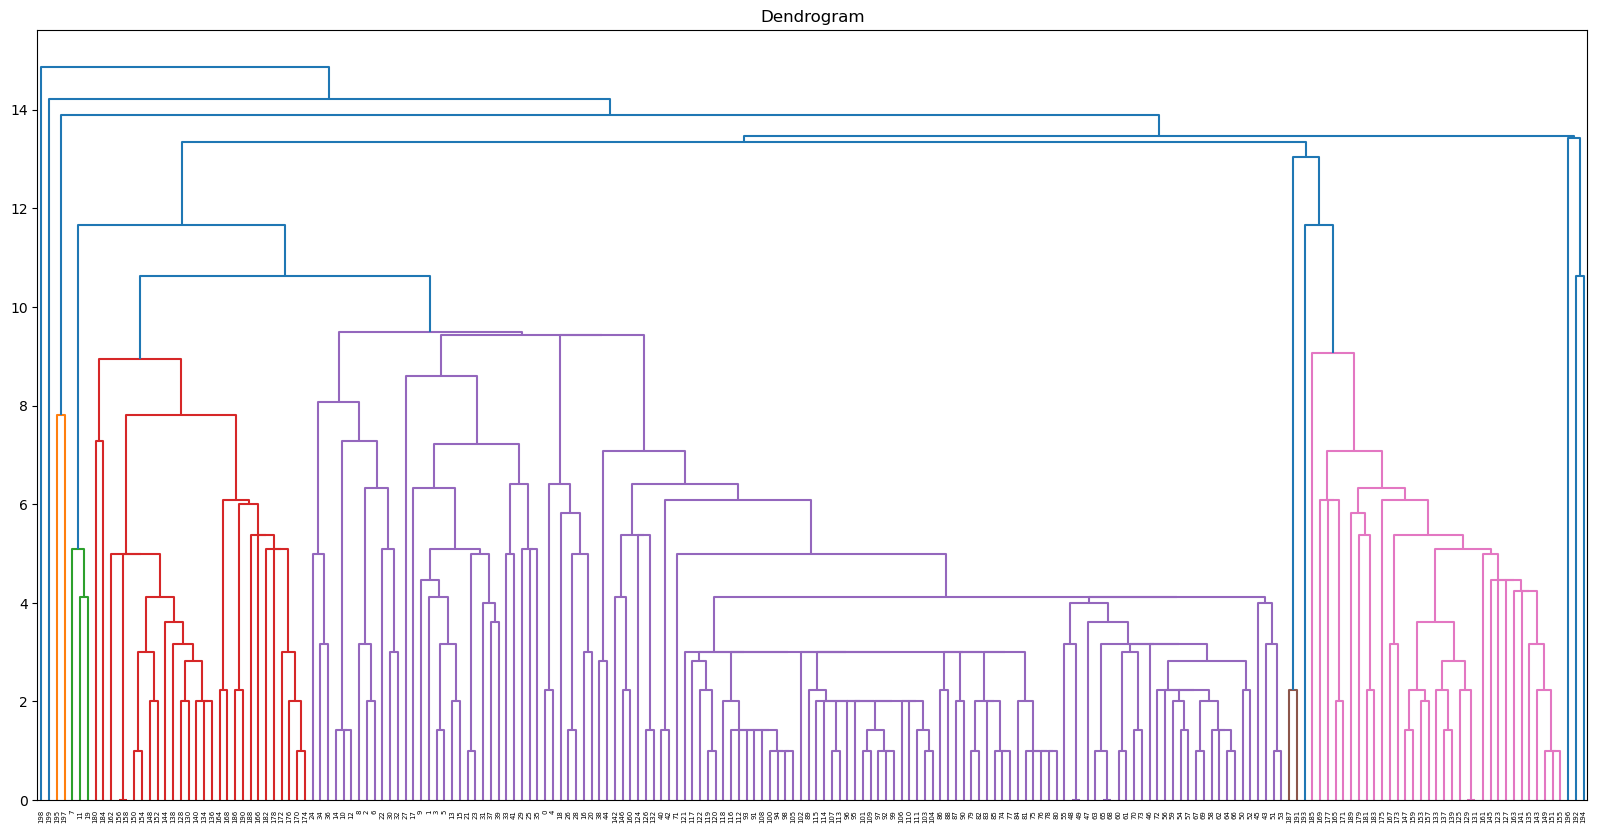

In [188]:
# Import library to generate dendogram
import scipy.cluster.hierarchy as sch
# Set plot size
plt.figure(figsize = (20, 10))
# Set the plot title
plt.title("Dendrogram")
# Generate the dendogram
dend = sch.dendrogram(sch.linkage(x2, method = 'single'))
# Show plot
plt.show()

The dendrogram is not balanced and is an extreme slant towards one end is observed. Such a dendrogram further illustrates thatthe clusters produced are bad.
Now we will run hierarchical clustering on the full dataset.

In [189]:
# Fit AgglomerativeClustering object to data
ag.fit_predict(x)
# Print the cluster label of each data point
print("Label of each point: ", ag.labels_)

Label of each point:  [0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 2 2 0 2 2 0 2 0 0
 0 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 3 1 2 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


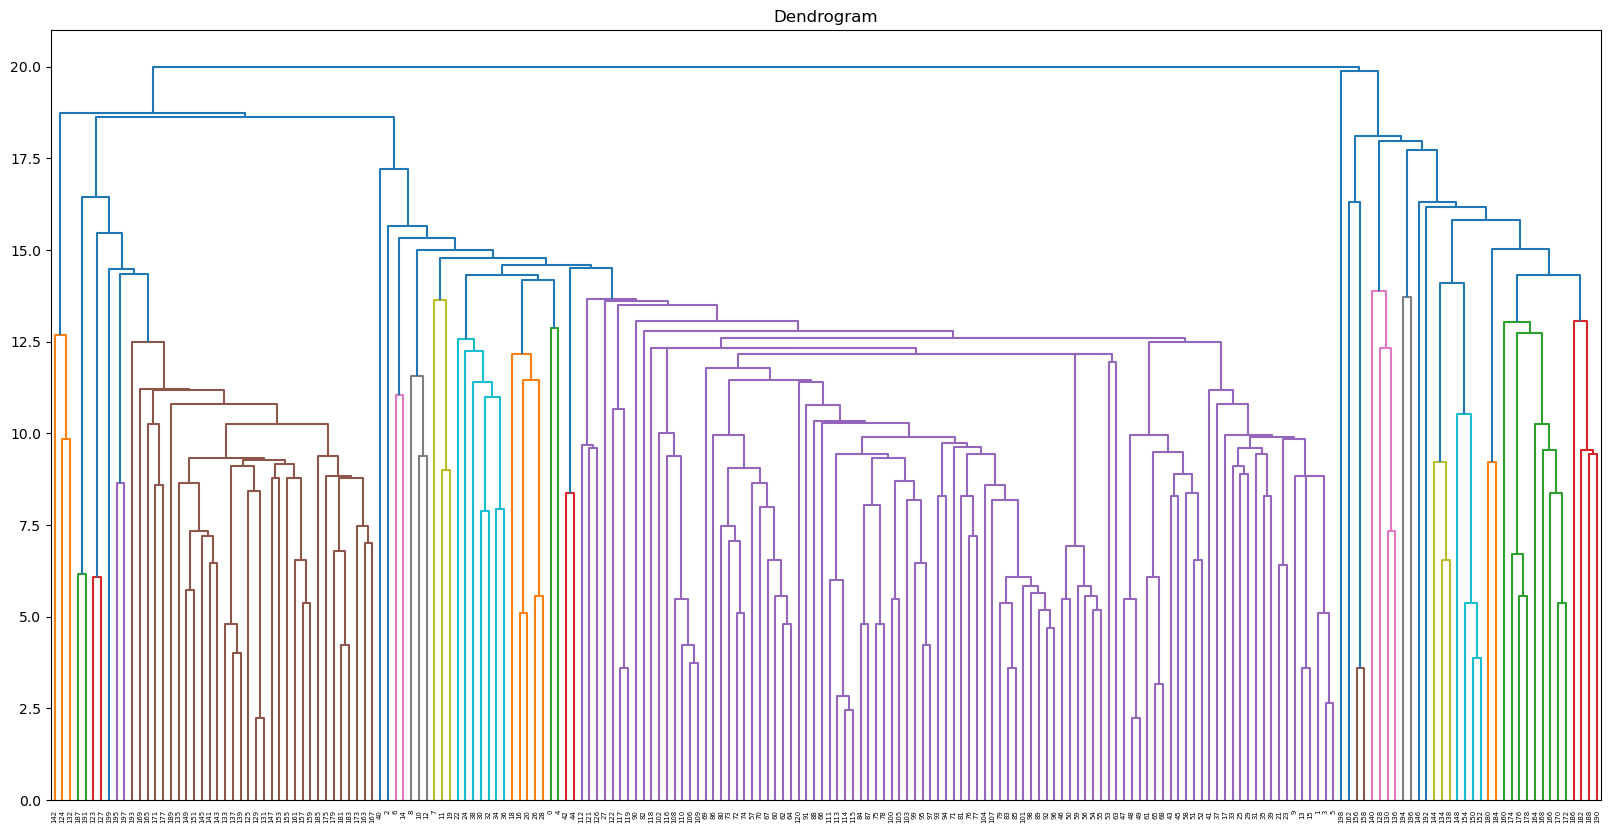

In [190]:
# Set plot size
plt.figure(figsize = (20, 10))
# Set the plot title
plt.title("Dendrogram")
# Generate the dendogram
dend = sch.dendrogram(sch.linkage(x, method = 'single'))
# How plot
plt.show()

When hierarchical clustering using single linkage is applied on the full dataset (x), the dendrogram also shows that most of thedata points still fall into one cluster. Thus, the clusters returned are bad.We can try to change the linkage parameter to see if we are able to produce better clusters. Let us change the linkage parameterto "complete".

In [191]:
# Create AgglomerativeClustering object
ag2 = AgglomerativeClustering(n_clusters = 5, metric = 'euclidean', linkage = 'complete')
ag2.fit_predict(x)
# Print the cluster label of each data point
print("Label of each point: ", ag2.labels_)

Label of each point:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 4 0 4 0 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 2 4 4 2 4 4 4 4 4 2 4 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 2 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


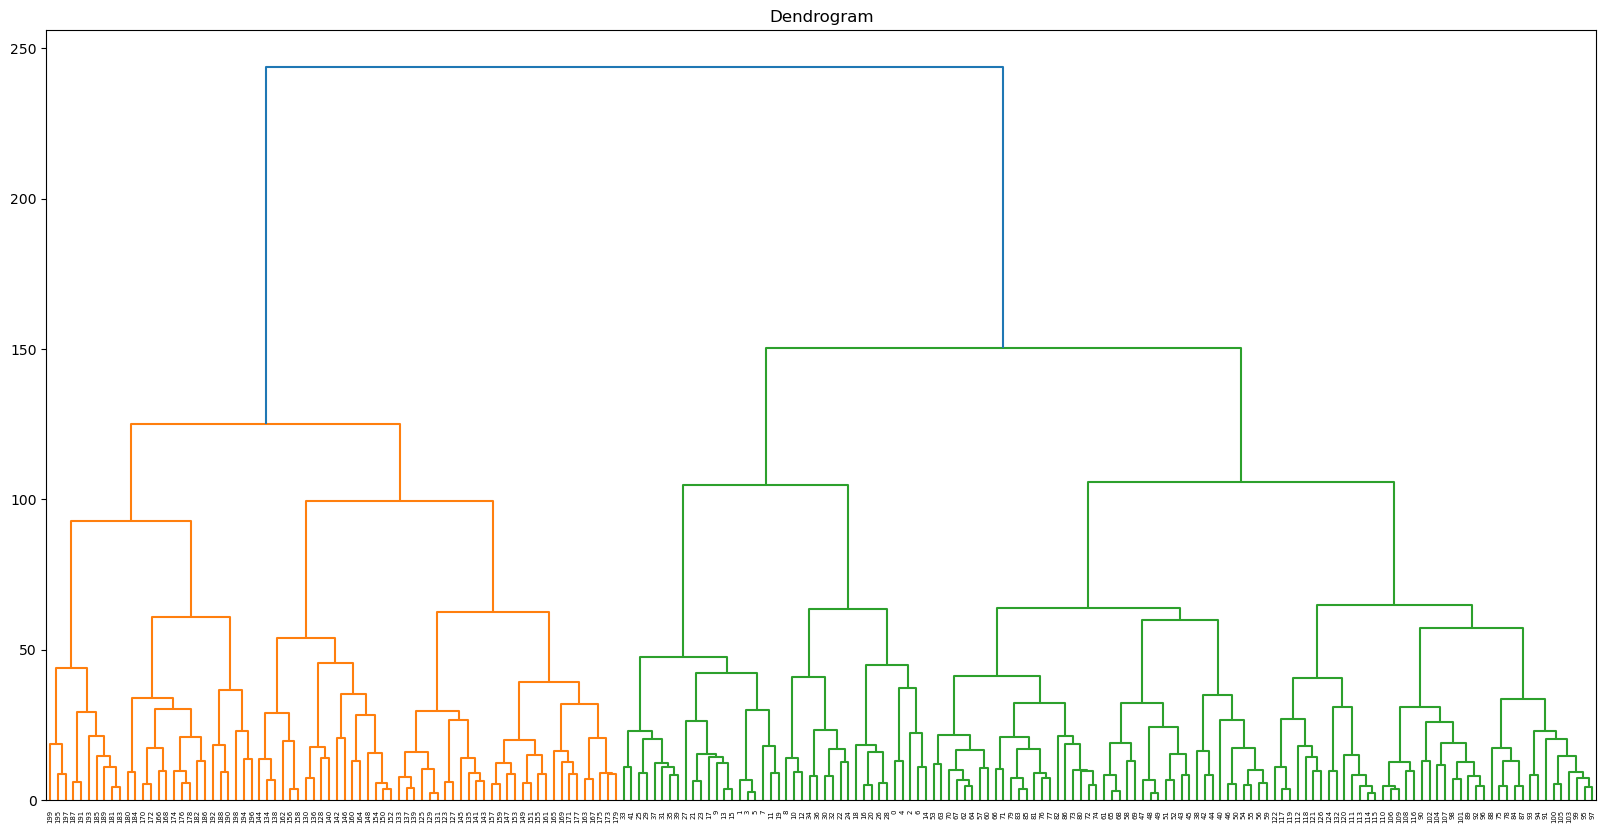

In [192]:
# Set plot size
plt.figure(figsize = (20, 10))
# Set the plot title
plt.title("Dendrogram")
# Generate the dendogram
dend = sch.dendrogram(sch.linkage(x, method = 'complete'))
# How plot
plt.show()

The dendrogram shows clear vertical gaps indicating natural groupings in the data. A horizontal cut at approximately distance 120 results in five clusters, which is consistent with the silhouette analysis where the highest score (0.553) was obtained for five clusters.